In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

2023-11-09 23:01:12.876845: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
credit = pd.read_csv("/Users/kimjuhwan/Desktop/data/creditcard.csv")

In [5]:
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(credit, test_size=0.2, random_state=42)
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, X_test.shape

((182276, 31), (45569, 31), (56962, 31))

In [8]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
272615,165180.0,-3.017333,3.215950,-2.844590,-1.341856,-0.491730,-1.776197,0.071360,1.470371,0.070087,...,0.258544,0.843397,0.086503,0.026228,0.082502,0.112516,0.618475,0.454782,0.77,0
191231,129171.0,2.099808,-0.890100,-2.817319,-1.208673,0.845043,0.138699,0.064751,-0.009282,-0.974776,...,0.567082,1.621804,-0.242970,-1.581675,0.522156,0.415164,-0.070427,-0.118390,48.00,0
53595,46061.0,0.812352,-0.586909,-0.667514,0.962864,0.401248,0.721682,0.343162,0.121239,0.059051,...,0.084476,-0.144437,-0.487009,-1.312940,0.806243,-0.202556,-0.027304,0.024049,230.57,0
193549,130180.0,-2.621263,-4.439432,-2.595440,-1.117193,2.489633,-2.625322,1.207772,-0.457577,-1.353822,...,1.265437,1.872310,1.862566,0.615607,-0.594514,-0.172620,0.199639,0.485647,588.15,0
207723,136809.0,2.227359,-1.572316,-0.371772,-1.578679,-1.593467,-0.157863,-1.598295,0.004422,-1.074622,...,0.089499,0.852866,0.098889,-0.305689,-0.178513,0.009100,0.045008,-0.053145,19.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131478,79616.0,-0.877913,-0.301831,2.735473,1.253404,-1.145942,0.068037,-0.076945,0.179777,0.601691,...,0.264666,0.931641,0.143916,1.033013,-0.117342,0.753320,0.104314,0.152018,133.50,0
239193,150000.0,-1.662279,-0.278422,2.677875,1.479724,-0.641821,0.421010,-1.162016,0.946243,0.705521,...,0.318863,0.747940,-0.328271,-0.004766,0.429288,-0.220109,0.057000,-0.105868,37.90,0
67705,52666.0,-1.061497,0.978902,1.629268,-1.385857,-0.074805,-1.054468,0.893588,-0.304963,0.396304,...,-0.191385,-0.143821,-0.080626,0.448429,-0.230180,0.697131,0.306224,0.115183,25.00,0
233557,147611.0,2.081836,-0.128730,-1.497688,0.049290,0.463113,-0.260199,0.090636,-0.139337,0.305002,...,-0.300450,-0.762338,0.183893,-1.088678,-0.175748,0.243605,-0.075166,-0.079110,8.99,0


Text(0, 0.5, 'Frequency')

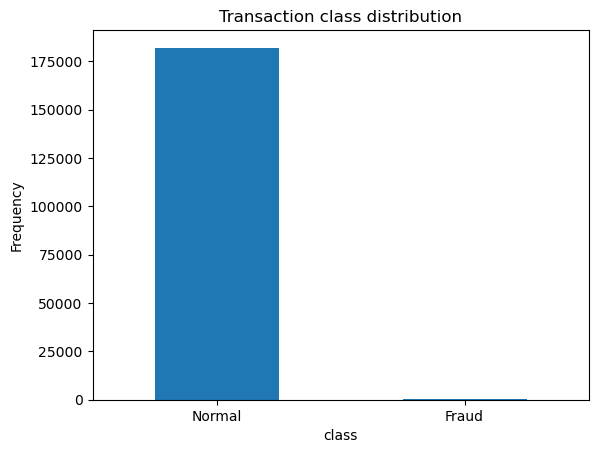

In [9]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(X_train['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("class")
plt.ylabel("Frequency")

In [10]:
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

X_val = X_val[X_val.Class == 0]
X_val = X_val.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the above splits using the MinMaxScaler from the scikit learn package
scaler = MinMaxScaler()

# Make sure to only fit the scaler on the training data
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)

In [13]:
X_train.shape

(181946, 30)

In [14]:
NUM_COL = 30

In [15]:
#Setting the Hyperparameters

learning_rate = 0.0001
batch_size = 512
epochs = 5
adam = Adam(learning_rate = learning_rate, beta_1 = 0.5)

In [16]:
#Defining the Generator network

def get_generator(optimizer):
    
    generator = Sequential()
    generator.add(Dense(64, input_dim=NUM_COL, kernel_initializer=initializers.glorot_normal(seed=42)))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(128))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(256))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(256))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(512))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(NUM_COL, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    
    return generator

In [17]:
##### Defining the Discriminator network

def get_discriminator(optimizer):
    
    discriminator = Sequential()
    
    discriminator.add(Dense(256, input_dim=NUM_COL, kernel_initializer=initializers.glorot_normal(seed=42)))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(1))
    discriminator.add(Activation('sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

    return discriminator

In [18]:
def get_gan_network(discriminator, generator, optimizer,input_dim=NUM_COL):

    discriminator.trainable = False   
    gan_input = Input(shape=(input_dim,))  
    x = generator(gan_input)        
    gan_output = discriminator(x)
    
    gan = Model(inputs=gan_input, outputs=gan_output)    
    gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    
    return gan

In [24]:
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers
from tensorflow.keras.layers import Activation
#Training the GAN

#Calculation the number of batches based on the batch size
batch_count = X_train.shape[0] // batch_size
pbar = tqdm(total = epochs * batch_count)
gan_loss = []
discriminator_loss = []

#Inititalizing the network
generator = get_generator(adam)
discriminator = get_discriminator(adam)
gan = get_gan_network(discriminator, generator, adam,input_dim=NUM_COL)

for epoch in range(epochs):
    for index in range(batch_count):
        pbar.update(1)
        #Creating a random set of input noise and images
        noise = np.random.normal(0, 1, size=[batch_size, NUM_COL])
        
        #Generate fake samples
        generated_images = generator.predict_on_batch(noise)
        
        #Obtain a batch of normal network packets
        image_batch = X_train[index * batch_size: (index + 1) * batch_size]
        
        X = np.vstack((generated_images, image_batch))
        y_dis = np.ones(2*batch_size)
        y_dis[:batch_size] = 0
        
        #Train discriminator
        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(X, y_dis)
        
        #Train generator
        noise = np.random.uniform(0, 1, size=[batch_size, NUM_COL])
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gen)
        
        #Record the losses
        discriminator_loss.append(d_loss)
        gan_loss.append(g_loss)
        
    print("Epoch %d Batch %d/%d [D loss: %f] [G loss:%f]" % (epoch,index,batch_count, d_loss, g_loss))              


  0%|                                                  | 0/1775 [00:50<?, ?it/s]
/Users/kimjuhwan/opt/anaconda3/envs/gcproject/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)

 20%|███████▉                                | 351/1775 [00:12<00:45, 31.33it/s]


 20%|████████                                | 359/1775 [00:12<00:44, 31.54it/s]

Epoch 0 Batch 354/355 [D loss: 0.075409] [G loss:0.013876]



 40%|████████████████▏                       | 716/1775 [00:23<00:37, 28.54it/s]

Epoch 1 Batch 354/355 [D loss: 0.033792] [G loss:0.004984]



 60%|███████████████████████▌               | 1071/1775 [00:35<00:22, 31.43it/s]

Epoch 2 Batch 354/355 [D loss: 0.014610] [G loss:0.006408]



 80%|███████████████████████████████▎       | 1425/1775 [00:46<00:10, 31.97it/s]

Epoch 3 Batch 354/355 [D loss: 0.023885] [G loss:0.006927]



100%|██████████████████████████████████████▉| 1774/1775 [00:57<00:00, 29.48it/s]

Epoch 4 Batch 354/355 [D loss: 0.017268] [G loss:0.006567]



100%|███████████████████████████████████████| 1775/1775 [01:09<00:00, 29.48it/s]

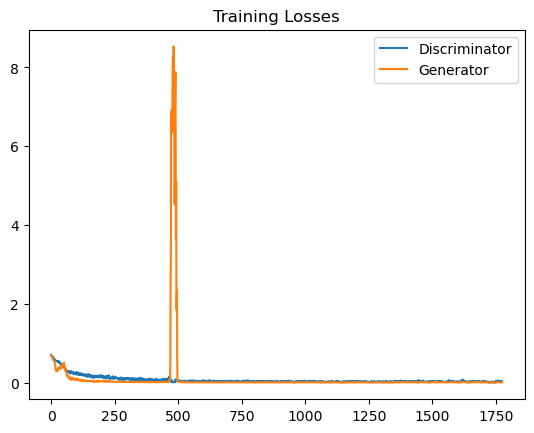

In [25]:
fig, ax = plt.subplots()
plt.plot(discriminator_loss, label='Discriminator')
plt.plot(gan_loss, label='Generator')
plt.title("Training Losses")
plt.legend()

In [26]:
#Predictions on the test set

nr_batches_test = np.ceil(X_test.shape[0] // batch_size).astype(np.int32)

results = []

for t in range(nr_batches_test + 1):
    ran_from = t * batch_size
    ran_to = (t + 1) * batch_size
    image_batch = X_test[ran_from:ran_to]
    tmp_rslt = discriminator.predict(x=image_batch,batch_size=128,verbose=0)        
    results = np.append(results, tmp_rslt)

In [27]:
results

array([1.44012811e-05, 1.12465918e-01, 5.28563410e-02, ...,
       4.14468080e-01, 7.12260455e-02, 1.81145873e-02])

In [28]:
y2 = y_test.to_numpy()

In [31]:
pd.options.display.float_format = '{:20,.7f}'.format
results_df = pd.concat([pd.DataFrame(results),pd.DataFrame(y2)], axis=1)
results_df.columns = ['results','y_test']
print ('Mean score for Normal data :', results_df.loc[results_df['y_test'] == 1, 'results'].mean() )
print ('Mean score for Fall data :', results_df.loc[results_df['y_test'] == 0, 'results'].mean())

Mean score for Normal data : 0.08461765238210256
Mean score for Fall data : 0.16384401880868074


In [32]:
#Obtaining the lowest 1% score
per = np.percentile(results, 1)
y_pred = results.copy()
y_pred = np.array(y_pred)

#Thresholding based on the score
inds = (y_pred > per)
inds_comp = (y_pred <= per)
y_pred[inds] = 0
y_pred[inds_comp] = 1

In [35]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

precision, recall, f1,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')
print ('Accuracy Score :',accuracy_score(y_test, y_pred) )
print ('Precision :',precision )
print ('Recall :',recall )
print ('F1 :',f1 )

Accuracy Score : 0.9897826621256276
Precision : 0.07543859649122807
Recall : 0.4387755102040816
F1 : 0.1287425149700599


Confusion Matrix :


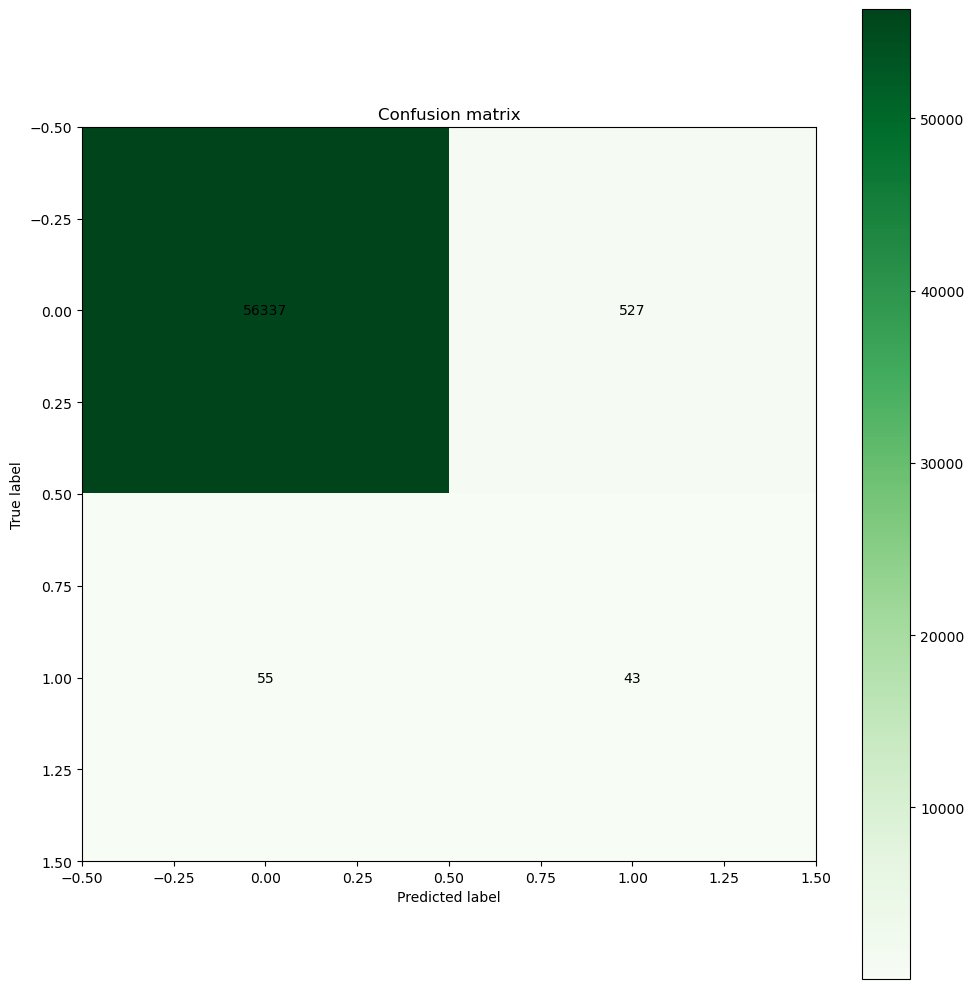

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print ('Confusion Matrix :')

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greens):
    plt.figure(figsize=(10,10),)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(cm)

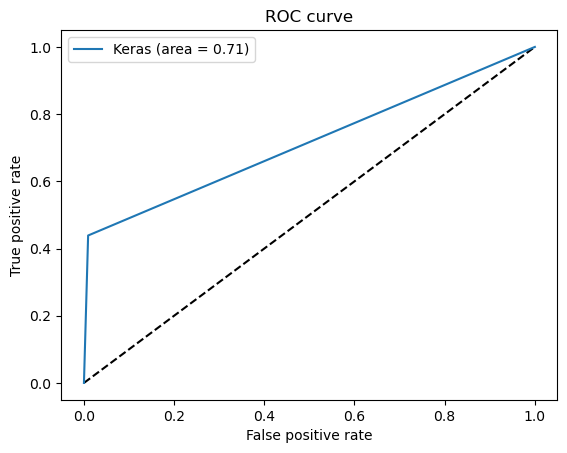

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.2f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()